In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

%matplotlib inline
plt.style.use('ggplot')    # 更改绘图风格， R语言绘图库的风格
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签

### 1. 初识数据

In [2]:
df = pd.read_csv('data/kelu.csv ')
df.info()
#  基本信息: 门票价格101，数据来自16年~19年，8K+多数据量

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     8757 non-null   object
 1   rating     8757 non-null   int64 
 2   time       8757 non-null   object
 3   year       8757 non-null   int64 
 4   amount     8757 non-null   int64 
 5   frequency  8757 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 410.6+ KB


In [3]:
df.describe()
#  根据平均分92, 和1/2分位得知, 大多数用户评分在100, 效果非常不错. 
# 16年~19年门票价格都是110


,rating,year,amount,frequency
count,8757.000000,8757.000000,8757.0,8757.0
mean,92.417495,2017.760420,110.0,1.0
std,14.231179,0.686734,0.0,0.0
min,20.000000,2016.000000,110.0,1.0
25%,80.000000,2017.000000,110.0,1.0
50%,100.000000,2018.000000,110.0,1.0
75%,100.000000,2018.000000,110.0,1.0
max,100.000000,2019.000000,110.0,1.0


### 2. 分析数据

    a1. 每天销量分析

<Axes: xlabel='time'>

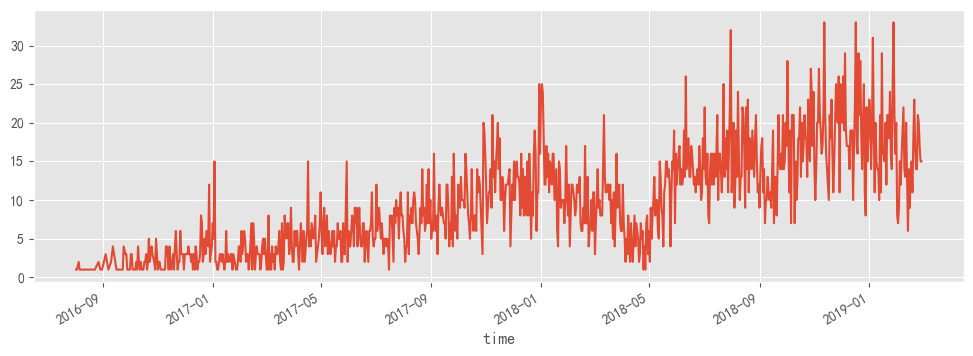

In [4]:
df['time'] = pd.to_datetime(df['time'], format='%Y/%m/%d')
df.groupby('time')['rating'].count().plot(figsize=(12, 4))

# 整体来看每日销量呈现上升趋势，但是在18年5月份前后(2, 3， 4)出现一次较大的波动，销量急剧下滑，猜测:极端天气，疫情
# 16年9月~17年1月，销量非常低，每天平均2-3张门票, 猜测： 101 观景台 刚开始营业, 知道的游客不多 

    a2. 每月销量分析

Text(0.5, 1.0, 'Monthly Sales Analysis between 16~19')

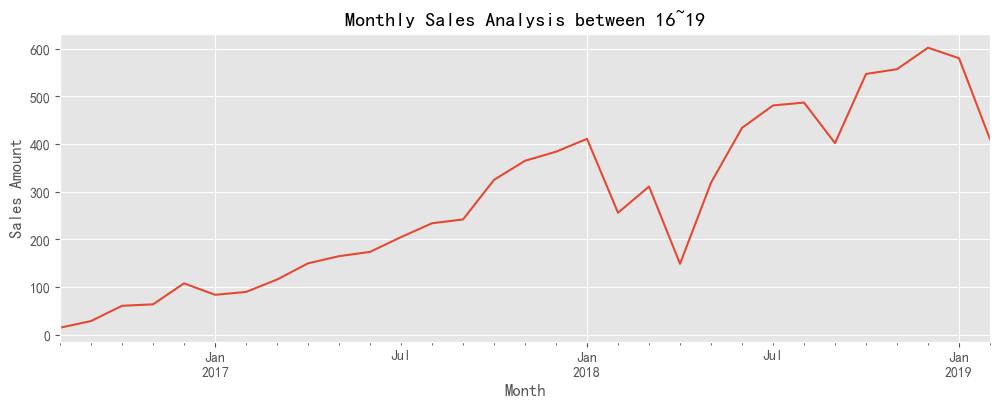

In [5]:
df['month'] = df['time'].values.astype('datetime64[M]')   # 保留月份精度的日期
df.groupby('month')['rating'].count().plot(figsize=(12,4))    # 按照月份精度进行计数
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.title('Monthly Sales Analysis between 16~19') 

#  月份整体销量依然呈现上升趋势, 但是在18年2、3、4月份销量下滑明显。 跟每天销量下降有关。猜测:台风，疫情，运营推广不利

    a3. 每个用户的购买量和消费金额分析

In [6]:
# merge 用法, 相当于 sql 里的 join
df1 = pd.DataFrame({
    'name':['七七', '温蒂', '魈'],
    'group':['A', 'B', 'C']
})

df2 = pd.DataFrame({
    'name':['魈', '刻晴'],
    'group':['C', 'D'],
    'age':[18, 19]
})

pd.merge(left=df1, right=df2, on='name', how='inner', suffixes=('_left', '_right'))
#  left:左表  right:右表  on:关联字段 
#  how:inner〈默认值，交集)|outer(并集)|left(只保留左侧)|right(只保留右侧)
#  suffixes:如果两个表中有多个相同列，用suffixes给的值进行区分(默认值xy)


,name,group_left,group_right,age
0,魈,C,C,18


Text(0, 0.5, '消费金额')

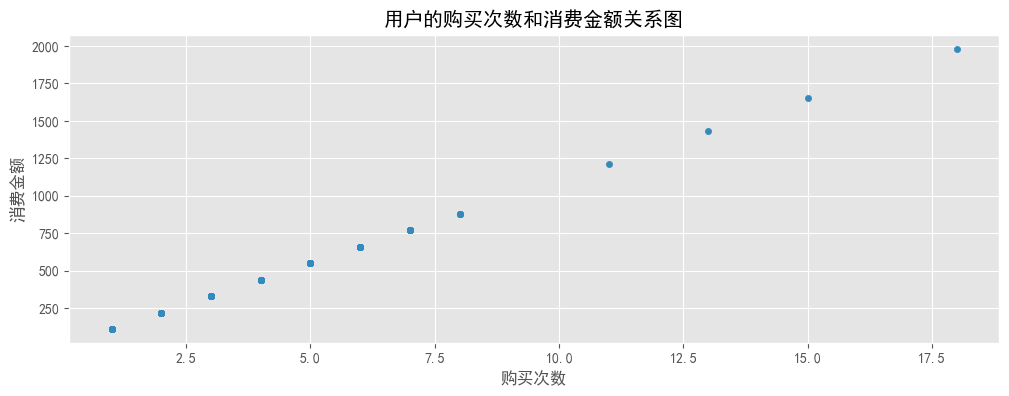

In [7]:
# 按照游客分组，统计每个游客的购买次数
import numpy as np
grouped_count_author = df.groupby('author')['frequency'].count().reset_index()

# 按照游客分组，统计每个游客的消费金额 
grouped_sum_amount = df.groupby('author')['amount'].sum().reset_index()
user_purchase_retention = pd.merge(left=grouped_count_author, 
                                   right=grouped_sum_amount,
                                   on='author',
                                   how='inner')
user_purchase_retention.plot.scatter(x='frequency', y='amount', figsize=(12, 4))
# plt.yticks(np.arange(0, user_purchase_retention['amount'].max(), 500))
plt.title('用户的购买次数和消费金额关系图')
plt.xlabel('购买次数')
plt.ylabel('消费金额')

#  结论: 斜率就是门票价格 110,  用户的消费金额和消费次数呈现线性关系

    b1.用户购买门票数量分析

Text(0.5, 1.0, '用户购买门票数量直方图')

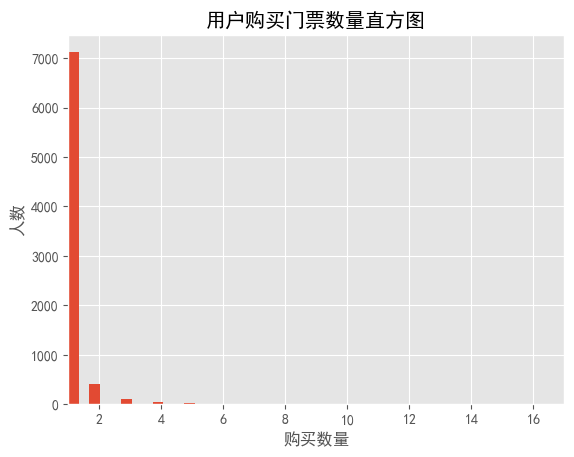

In [8]:
df.groupby('author')['frequency'].count().plot.hist(bins=50)
# bins 影响柱子的宽度，宽度=(最大值-最小值)/bins
plt.xlim(1,17)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('用户购买门票数量直方图')
# 绝大多数用户购买过1张门票，用户在7000左右
# 少数人购买过2~4张门票，猜测:  可能是台北周边用户

    b2. 用户购买门票2次及以上情况分析

Text(0.5, 1.0, '购买门票在2次以上的用户数量')

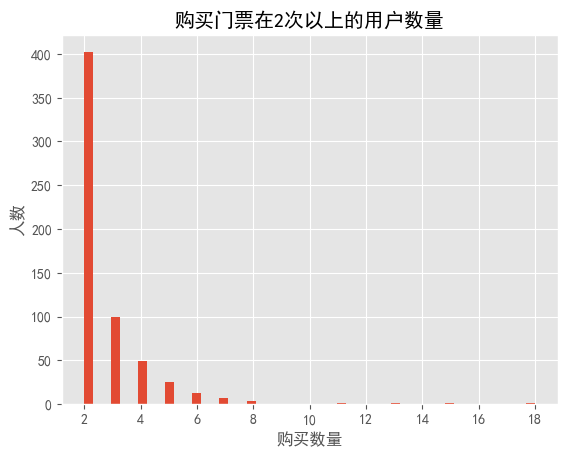

In [9]:
df_frequency_2 = df.groupby('author').count().reset_index()
df_frequency_2[df_frequency_2['frequency']>=2].groupby('author')['frequency'].sum().plot.hist(bins=50)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('购买门票在2次以上的用户数量')

# 消费两次的用户在整体上占比较大，大于2次的用户占小部分，用户购买次数最多为8次

    b3.查看2次及以上的具体人数

In [10]:
df_frequency_2 = df.groupby('author').count().reset_index()
df_frequency_2[df_frequency_2['frequency']>=2].groupby('frequency')['author'].count()

# 出去购买一次的顾客，可以看出购买2次有402人，购买3次的99人，以此类推得知 大多数人倾向于购买2~5

frequency
2     402
3      99
4      49
5      25
6      13
7       7
8       4
11      1
13      1
15      1
18      1
Name: author, dtype: int64

    b4.购买次数在1~5次之间的用户占比分析

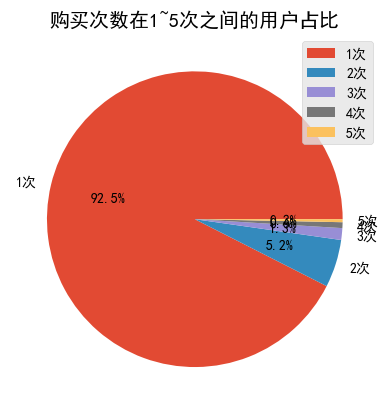

In [11]:
#对用户author进行分组
# 取出消费频率 进行运辑判断(1-5)
# 数据可视化
df_frequency_gte_1 = df.groupby('author')['frequency'].count().reset_index()
# df_frequency_gte_1.tail(60)
#  购买次数 >= 1
df_frequency_gte_1 = df_frequency_gte_1[df_frequency_gte_1['frequency']>=1]

#  购买次数 <= 5
values = df_frequency_gte_1[df_frequency_gte_1['frequency']<=5].groupby('frequency')['frequency'].count()

#  绘制饼图
labels= ['1次','2次','3次','4次','5次']
plt.pie(values,labels=labels, autopct='%1.1f%%')
plt.title('购买次数在1~5次之间的用户占比')
plt.legend()

    b5.购买次数在2~5次之间的用户占比分析

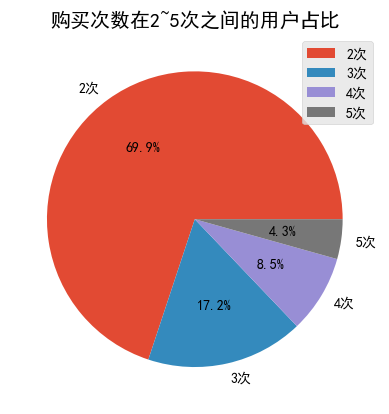

In [12]:
df_frequency_gte_2 = df.groupby('author')['frequency'].count().reset_index()
# df_frequency_gte_1.tail(60)
#  购买次数 >= 2
df_frequency_gte_2 = df_frequency_gte_2[df_frequency_gte_2['frequency']>=2]

#  购买次数 <= 5
values_1 = df_frequency_gte_2[df_frequency_gte_2['frequency']<=5].groupby('frequency')['frequency'].count()

#  绘制饼图
labels= ['2次','3次','4次','5次']
plt.pie(values_1,labels=labels, autopct='%1.1f%%')
plt.title('购买次数在2~5次之间的用户占比')
plt.legend()

#  在购物次数在2~5次的用户中，其中消费2次的占比70%，消费3次占比17%，4次占比8.5%，5次占比4.3%
#  消费2, 3次的用户依然很重要
#  消费次数在4, 5比重较少，需要针对性的对2, 3次的用户进行引导
#  消费次数在1次的用户，可以尝试转化到消费2, 3次

    c1.复购率分析

Text(0.5, 1.0, '16-19年每月用户复购率')

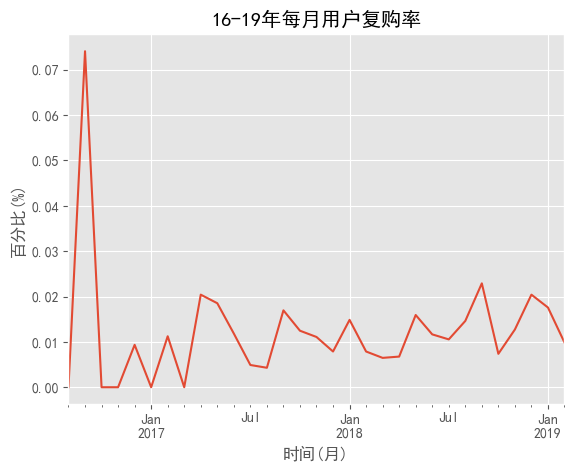

In [13]:
#  复购率: 在某一时间窗口内(多指一个月)内消费次数在 两次及以上的用户在总消费用户的占比

# df.head()
# 创建透视表
pivot_table = df.pivot_table(index='author', 
                             columns = 'month',
                             values='frequency', 
                             aggfunc='count').fillna(0)
# pivot_table

# 三种情况: 
#  消费次数 > 1, 为复购用户, 用 1 表示 
#  消费次数 = 1, 为非复购用户,  用 0 表示
#  消费次数 = 0, 未消费用户,  用 na 表示

#  applymap: df, 处理每一个元素 【弃用】
#  apply: df, 处理每一行或者每一列数据
#  map: Series, 处理每一个元素

# 使用apply函数处理每一行或每一列的数据
#  获取复购用户
rebuy_table = pivot_table.apply(lambda row: row.apply(lambda x: 1 if x > 1 else 0 if x == 1 else np.NAN), axis=1)
# rebuy_table[rebuy_table['2016-09-01']==1]

(rebuy_table.sum()/rebuy_table.count()).plot()
plt.xlabel('时间(月)')
plt.ylabel('百分比(%)')
plt.title('16-19年每月用户复购率')


#  16年9月份复购率最高达到了7.5%，然后开始下降，趋于平稳在1.2%

    c2.复购人数

Text(0.5, 1.0, '16~19年每月的复购人数折线图')

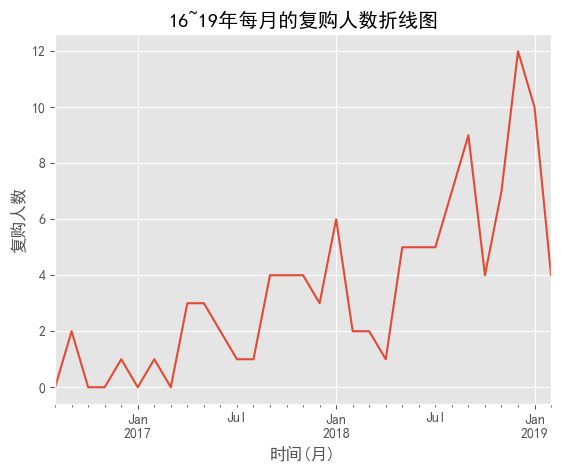

In [14]:
rebuy_table.sum().plot()
plt.xlabel('时间(月)')
plt.ylabel('复购人数')
plt.title('16~19年每月的复购人数折线图')

# 整体来看，复购人数长线上升趋势
#  但是在18年2,3,4,10和19年2月份，复购人数下降较为明显，出现异常信号，需要和业务部门具体分析情况

    c3.回购率分析

In [15]:
# 回购率:在某一个时间窗口内消费过的用户，在下一个时间窗口仍旧消费的占比
# 举个例子:当前月消费用户人数1000人，其中260人在下一个月仍旧进行了消费，回购260/1000=20%

p_purchase = df.pivot_table(index='author',
               columns='month',
               values='frequency',
               aggfunc='count'
               ).fillna(0)
len(p_purchase.columns)

31

Text(0, 0.5, '回购率%')

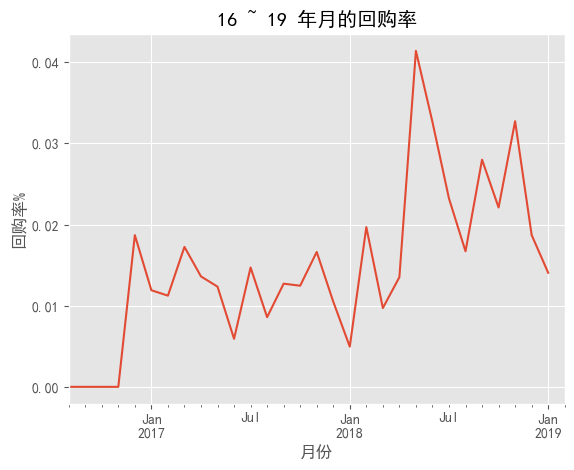

In [16]:
def purchase_return(data):  # data: 代表的是每一个游客的所有月份消费记录
    status = []    # 存储每一个月回购状态

    for i in range(30):    # 遍历每一个月 (最后一个月除外)
        #  本月消费
        if data.iloc[i] >=1:
            if data.iloc[i+1] == 1:   # 下个月有消费，是回购用户，1
                status.append(1)
            else:   # na | 未消费
                status.append(0)    # 非回购用户， 0
        else:    # 本月未消费
            status.append(np.NaN)
    status.append(np.NaN)

    return pd.Series(status, p_purchase.columns)

 
p_purchase_return = p_purchase.apply(purchase_return, axis=1)    # 用户回购状态
r_rate = p_purchase_return.sum()/p_purchase_return.count()    # 回购率
r_rate.plot()
plt.title('16 ~ 19 年月的回购率')
plt.xlabel('月份')
plt.ylabel('回购率%')

# 回购率最高在18年6月份，达到4%
#整体来看，回购率呈现微弱上升趋势
#出现了几次较大下滑，分别是17年6月份，18年1月份，18年8月份，19年1月份

    c4.回购人数分析

Text(0, 0.5, '回购人数')

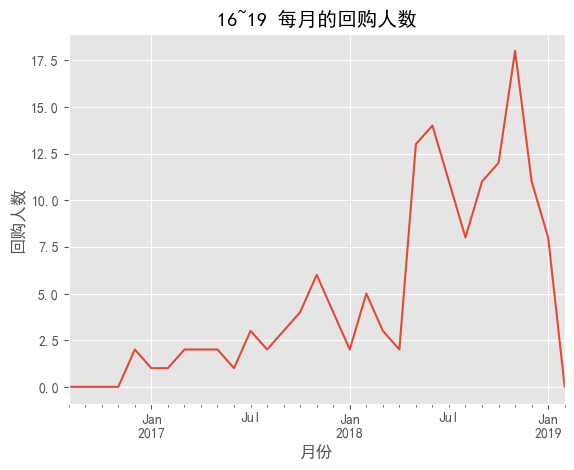

In [17]:
p_purchase_return.sum().plot()
# plt.ylim(0,19)

plt.title('16~19 每月的回购人数')
plt.xlabel('月份')
plt.ylabel('回购人数')

#整体呈现上升趋势，回购人数最多时在18年11月份，人数为17人

    c5.每个月分层用户占比情况

In [18]:
#活跃用户|不活跃用户|回流用户|新用户

p_purchase = df.pivot_table(index='author',
               columns='month',
               values='frequency',
               aggfunc='count'
               ).fillna(0)

p_purchase

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Goh Yu Wen Eunice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hui Shan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Huihui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO-CHENG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
華山,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
蘇,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
def active_status(data):   # data : 整行数据. 共 18 列
    '''
    功能：
        这个函数 active_status 的功能是根据给定的用户消费数据，将用户按照其消费行为分为不同的状态，
        包括："unreg"（未注册）、"new"（新用户）、"active"（活跃用户）、"unactive"（不活跃用户）、"return"（回流用户）。
    '''
    # 定义一个空列表 status 用来存储每个月的用户状态。
    status= []    # 负责 储存 31 个月的状态:  unreg|new|active|unactive|return

    # 逐个月判断用户状态，并存储到 status 列表中。
    for i in range(31):
        # 本月没消费
        # 如果本月没有消费（即消费额为0），则根据前一个月的状态判断当前月的用户状态。
        if data.iloc[i] == 0:
            if len(status) == 0:                    
                status.append('unreg')
            else:                                   
                #若前一个月状态为未注册（'unreg'），则本月状态仍为未注册；否则，本月状态为不活跃（'unactive'）。
                if status[i-1] == 'unreg':          
                    status.append('unreg') 
                else:                               
                    status.append('unactive')       
        
        # 本月有消费 == 1
        # 如果本月有消费，则根据前一个月的状态判断当前月的用户状态。
        else:
            if len(status) == 0:                    # 前面没有任何记录（97年1月份）
                status.append('new')                # 第一次消费
            else:
                # 若前一个月状态为不活跃（'unactive'），则本月状态为回流（'return'）；
                if status[i-1] =='unactive':
                    status.append('return')
                # 若前一个月状态为未注册（'unreg'），则本月状态为新用户（'new'）；
                elif status[i-1] == 'unreg':
                    status.append('new')            # 第一次消费
                else:                               # new|active|return = 1 
                    # 否则，本月状态为活跃（'active'）。
                    status.append('active')         # 本月消费过
    
    # 返回一个 Pandas Series 对象，其中包含了每个月对应的用户状态，并且列名与原始数据的列名相同
    return pd.Series(status, p_purchase.columns)   # 值status, 列名 df_purchase 中的列名
p_purchase_status = p_purchase.apply(active_status, axis=1)
p_purchase_status

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive
Goh Yu Wen Eunice,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Hui Shan,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Huihui,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
KO-CHENG,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
華山,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
蘇,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


<Axes: xlabel='month'>

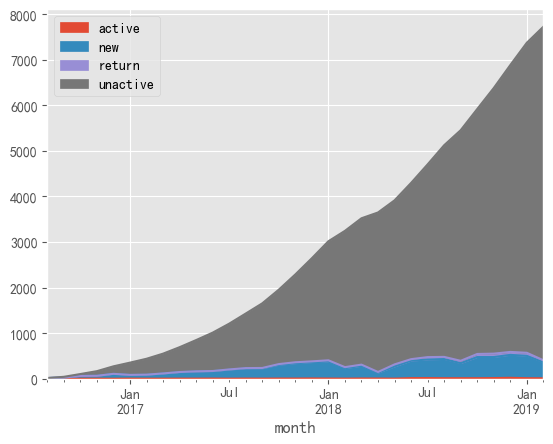

In [20]:
# 用 nan 替换 unreg
p_purchase_status_ = p_purchase_status.replace('unreg', np.NaN).apply(lambda x: pd.Series(x).value_counts())
p_purchase_status_.T.plot.area()

#  可以看出，灰色(不活跃用户)占据网站用户的主体
#  蓝色(新用户)从17年的1月~19年1月，星现上升趋势，但是在18年4月份左右，新用户的最突然急剧下降，异常信号:
#  以后，新用户又开始逐渐上涨，回复稳定状态
#  紫色(回流用户)，一直维持稳定稳定状态，但是在18年2~4月份,出现异常下降情况，并常信号:

    c6.每月不同用户的占比

<Axes: xlabel='month'>

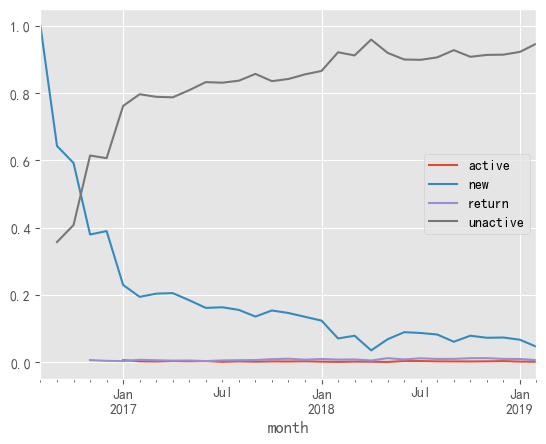

In [21]:
return_rate = p_purchase_status_.apply(lambda x:x/x.sum())
return_rate.T.plot()

# 在17年1月份过后，网站用户主体由不活跃用户组成，新用户占比开始逐渐下降，并且趋于稳定，稳定在10%左右
# 活跃用户和会用户，一直很稳定，并且占比较小
# 16年9月前后，新用户和不活跃用户，发生较大的变化，精测:活动或者节假日造成.。


    C7.每月活跃用户的占比

Text(0.5, 1.0, '每月活跃用户的占比分析')

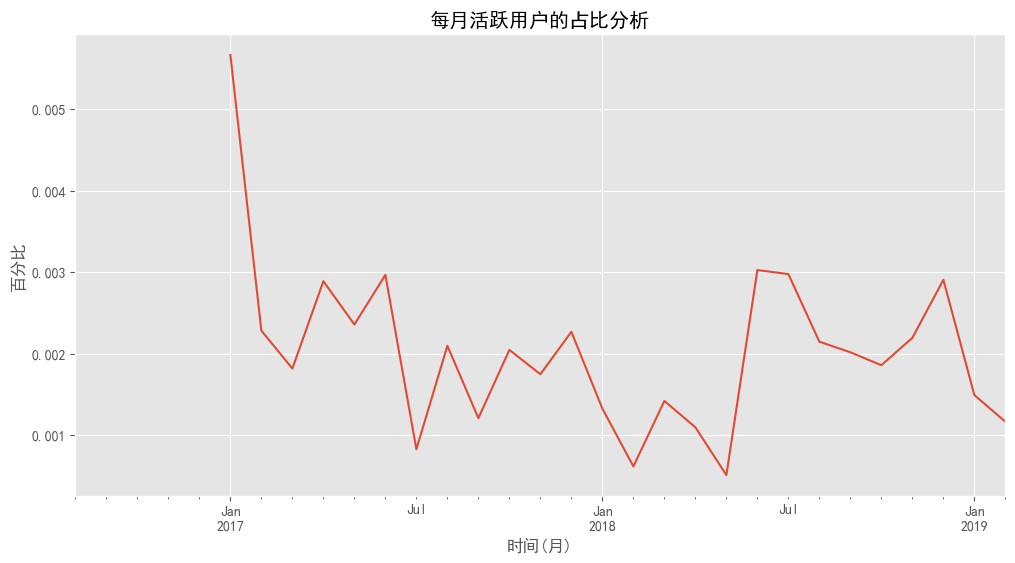

In [22]:
return_rate.T['active'].plot(figsize=(12,6))
plt.xlabel('时间(月)')
plt.ylabel('百分比')
plt.title('每月活跃用户的占比分析')

# 在17年1月份活跃用户占比较高，在0.5%，但是在1-2月份，急剧下降，猜测:春节的影响，或者温度
# 结合历年1~2月份销量来看，都会出现一定比例的下降，再次验证我们的猜测:春节的影响

#  在18年的2月和5月出现异常， 门票销量下降， 猜测：天气原因， 雨水或台风

    C8.每月回流用户占比

5

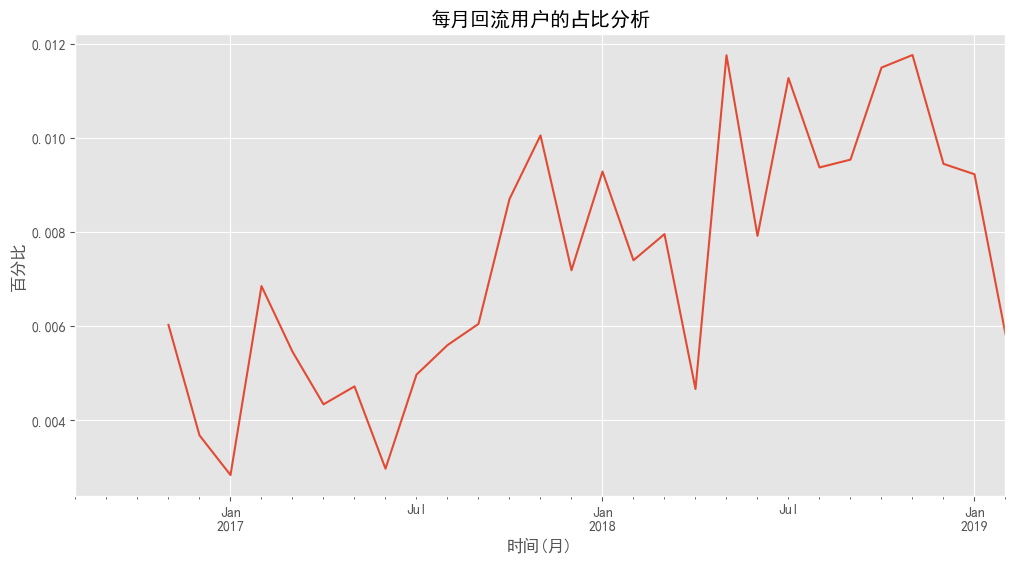

In [23]:
return_rate.T['return'].plot(figsize=(12,6))
plt.xlabel('时间(月)')
plt.ylabel('百分比')
plt.title('每月回流用户的占比分析')


#  整体来看， 整体回流用户比例上升趋势， 但是波动较大
#  在17年的1月和6月， 18年 4月， 19年2月， 回流用户比例都出现了较大幅度下降，表现为异常信号
5#  无论是回流用户还是活跃用户， 在以上几个月份中都表现出下降趋势

In [24]:
# 回流用户的平均值在 0.73%左右
np.mean(return_rate.T['return'])

#  在17年9月份以后，仅有一个异常点在平均值以下
#  在17年9月份以前，所有数据都显示出回流用户比例低于平均值，猜测:本景点开饭不久，很多游客尚未发现本景点
#  本景点在该平台上线不久

0.00736823576229978

    d1.用户的生命周期

In [25]:
# 计算方式: 每一个用户最后一个购买商品的时间 - 第一次购买商品的时间， 转换成天数， 即为生命周期

time_min = df.groupby('author')['time'].min()
time_max = df.groupby('author')['time'].max()   
time_diff = (time_max - time_min).reset_index()
time_diff.describe()

#  通过原样本8757条和count=7722得知，存在一个用户多次消费的情况
#  平均生命周期天数23天，通过25%, 50%, 75%分位数得知，绝大多用户生命周期为0天，
#  最大生命周期为 864天

time_diff

,author,time
0,wenbiao,0 days
1,Goh Yu Wen Eunice,0 days
2,Hui Shan,0 days
3,Huihui,0 days
4,KO-CHENG,0 days
...,...,...
7717,芊羽,0 days
7718,華山,0 days
7719,蘇,0 days
7720,郁君,0 days


    d2.用户生命周期直方图

                  author   time  life_time
0                wenbiao 0 days        0.0
1      Goh Yu Wen Eunice 0 days        0.0
2               Hui Shan 0 days        0.0
3                 Huihui 0 days        0.0
4               KO-CHENG 0 days        0.0
...                  ...    ...        ...
7717                  芊羽 0 days        0.0
7718                  華山 0 days        0.0
7719                   蘇 0 days        0.0
7720                  郁君 0 days        0.0
7721                  青慧 0 days        0.0

[7130 rows x 3 columns]


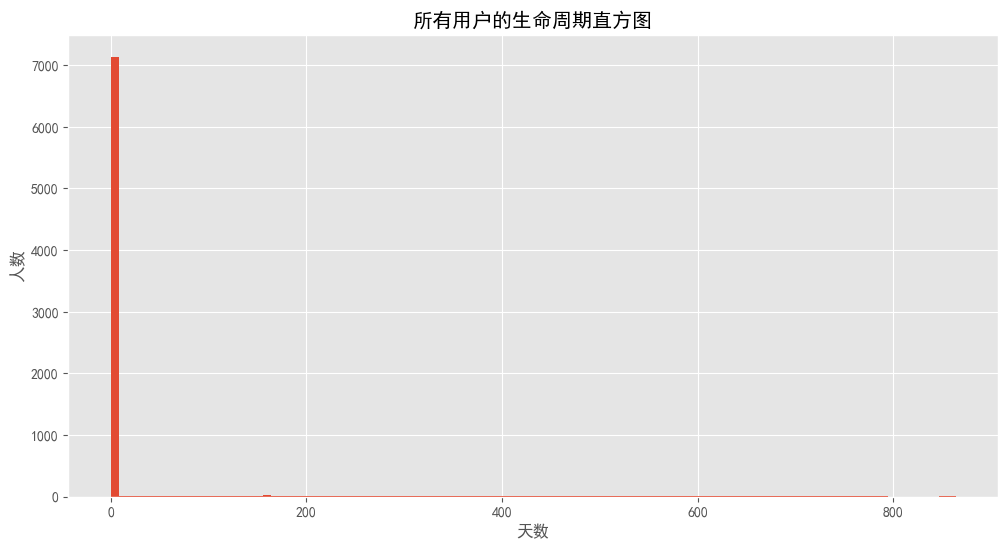

In [26]:
#  将日期类型转换成数值类型
time_diff['life_time']=time_diff['time']/np.timedelta64(1, 'D')
time_diff['life_time'].plot(kind='hist',bins=100, figsize=(12,6))
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('所有用户的生命周期直方图')

print(time_diff[time_diff['life_time']==0])
# 生命周期为0的用户(仅仅在一天内有过消费，之后再没消费过)，存在7130个用户
#  由于总用户为 7722， 其余592人属于优质的忠诚客户

    d3.生命周期大于 0 天的用户， 直方图

300.9662162162162

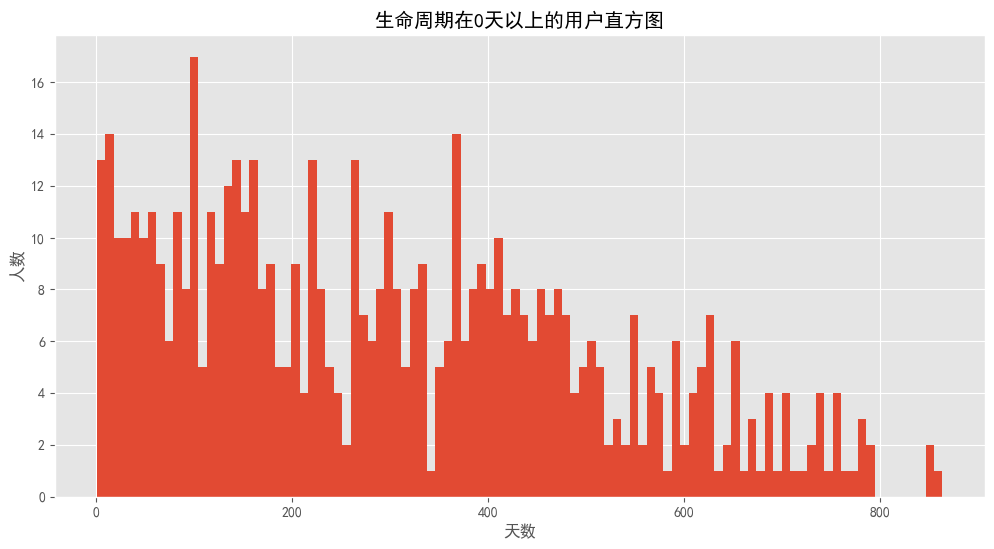

In [27]:
# time_diff[time_diff['life_time']>0].life_time
time_diff[time_diff['life_time']>0]['life_time'].plot.hist(bins=100, figsize=(12, 6))
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('生命周期在0天以上的用户直方图')
time_diff[time_diff['life_time']>0]['life_time'].mean()

#  去掉生命周期为0的用户， 可知
#  用户平均生命周期为300天, 生命周期在100天的用户量达到了最大值17人
#  从生命周期100-350天来看， 用户量呈现缓慢下降的趋势
#  生命周期 350-800天足有来看, 用户量下降速度明显， 存在一定用户流失， 而忠诚用户越来越少


    d4.各时间段的用户留存率

`pd.cut()` 是 Pandas 库中的一个函数，主要用于将一组数据分成不同的区间或者桶。这个函数通常用于对连续型数据进行离散化处理，使得数据可以更好地进行分析和理解。

具体来说，`pd.cut()` 可以实现以下功能：

1. **分箱（Binning）**：将连续的数值数据划分成若干个区间或者桶。这些区间可以是等宽的，也可以是根据数据分布自动确定的不等宽区间。

2. **离散化（Discretization）**：将连续的数值型数据转换成离散的分类数据，使得数据变得更易于理解和处理。

3. **标记数据（Labeling Data）**：将数据根据其所属的区间或者桶进行标记，以便后续的分析和可视化。

4. **统计分析**：可以结合分箱后的数据进行统计分析，比如计算各个区间的数据频数、频率、均值、标准差等。

5. **数据清洗和预处理**：在数据分析和建模过程中，常常需要对数据进行清洗和预处理，`pd.cut()` 可以用来处理连续型数据的离散化，是数据预处理的重要步骤之一。

使用 `pd.cut()` 函数需要提供要进行分箱的数据以及分箱的方式，比如指定区间的边界或者要划分的箱子的个数。函数返回一个包含了每个数据点所属区间或者桶的 Series 或者 Categorical 对象。

In [28]:
#  pd.cut() 函数
np.random.seed(42)    # 保证每次运行程序产生的随机数都是相同的

score_list = np.random.randint(25, 100, size=3)
print(score_list)

bins = [0, 59, 70, 80, 100]    # 指定多个区间
score_cut = pd.cut(score_list, bins)

score_cut

[76 39 96]


[(70, 80], (0, 59], (80, 100]]
Categories (4, interval[int64, right]): [(0, 59] < (59, 70] < (70, 80] < (80, 100]]

time_diff_bin
(0, 90]       0.022663
(90, 180]     0.019814
(180, 270]    0.016058
(270, 360]    0.014893
(360, 450]    0.014375
(450, 540]    0.009842
(540, 630]    0.007641
(630, 720]    0.004921
(720, 810]    0.002720
(810, 900]    0.000389
dtype: float64


C:\Users\Rainbow\AppData\Local\Temp\ipykernel_34392\594298095.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_retention = user_purchase_retention.groupby(['author', 'time_diff_bin'])['frequency'].sum().unstack()


Text(0.5, 1.0, '各时间段内的用户留存率')

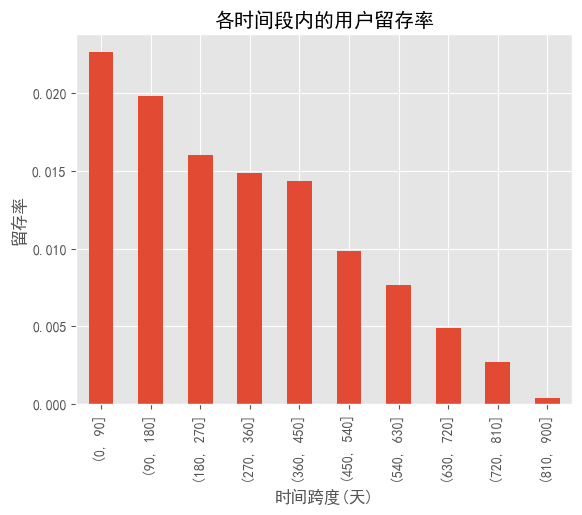

In [40]:
#  留存率： 1~90 天 有多少留存用户， 求出用户的留存天数， 比如留存天数 == 89, 属于1~90天内的留存用户
#  留存天数计算方式: 用户每一次的消费时间分别减去用户第一次消费时间
# left: 左表; right: 右表. how：连接方式, on: 连接字段， suffixes: 针对相同列名， 指定不同的后缀
 
user_purchase_retention = pd.merge(left=df, right=time_min.reset_index(), how='inner', on ='author', suffixes=('','_min'))
# user_purchase_retention

#  计算留存天数
user_purchase_retention['time_diff'] = user_purchase_retention['time']-user_purchase_retention['time_min']

#  将 time_diff 转成数值
user_purchase_retention['time_diff'] = user_purchase_retention['time_diff'].apply(lambda x: x/np.timedelta64(1, 'D'))
# user_purchase_retention

#  生成时间跨度 (3个月 即90天), 判断属于哪个区间
bin = [i*90 for i in range(11)]
# bin
user_purchase_retention['time_diff_bin'] = pd.cut(user_purchase_retention['time_diff'],bin)

#  统计每个游客, 在不同的时间段内的消费频率率和值 (便于稍后判断该用户在某个区间内是不是留存用户)
pivot_retention = user_purchase_retention.groupby(['author', 'time_diff_bin'])['frequency'].sum().unstack()

#  判断是否是留存用户(1: 留存， 0: 未留存)
pivot_retention_trans = pivot_retention.fillna(0).map(lambda x:1 if x>0 else 0)
# pivot_retention.head(60)

#  留存率
print(pivot_retention_trans.sum()/pivot_retention_trans.count())
(pivot_retention_trans.sum()/pivot_retention_trans.count()).plot.bar()
plt.xlabel('时间跨度(天)')
plt.ylabel('留存率')
plt.title('各时间段内的用户留存率')

In [ ]:
# 如图, 每个周期是3个月，第一个周期的留存率在2.2%，前三个周期的递减速度在 0.3% 左右
#  在第四第五个周期的时候 趋于平稳， 稳定在留存率 1.5%左右
#  从第五个周期开始， 留存率明显下降， 下降到几乎0%。 
#  在第四,五周期（1年）的时候， 需采取方法将用户留住进行再次消费。 
#  如果在跨度为 1年 的时候， 不召回用户， 则就会面临大量用户流失的风险。 